# Einführung in dynamische Systeme

Dynamische Systeme spielen eine zentrale Rolle bei der Beschreibung zeitabhängiger Prozesse in vielen verschiedenen Anwendungsgebieten, wie zum Beispiel der Biologie oder der Physik.
Durch diese Art von mathematischen Modellen ist es beispielsweise möglich das Ausschwingen eines Pendels zu beschreiben oder den Bestand zweier unterschiedlicher Populationen über die Zeit in einer Räuber-Beute Beziehung zu untersuchen.

Maßgeblich für dynamische Systeme ist die Beobachtung, dass die beschriebenen Prozesse nicht von der Wahl des Anfangszeitpunktes abhängig sind, sondern lediglich von dem gewählten Anfangszustand.
Wir werden diese Eigenschaft später in Sektion {ref}`s:fluesse` noch genauer mathematisch charakterisieren.

Je nach Anwendungsgebiet können dynamische Systeme entweder **diskret** oder **kontinuierlich** in der Zeitentwicklung sein.
Wir wollen im Folgenden zwei Beispiele zur Illustration des Unterschieds in der Zeitmodellierung diskutieren.

## Diskrete dynamische Systeme

Zur Veranschaulichung von diskreten dynamischen System wollen wir uns im Folgenden mit einem Beispiel aus der Biologie beschäftigen.

````{prf:example} Wachstum von Bakterien
:label: ex:bacteria

In diesem Beispiel wollen wir annehmen, dass wir das **exponentielle Wachstum** von Bakterien durch Zellteilung als diskretes dynamisches System zu festen, äquidistanten Zeitpunkten $t_0, t_1, \ldots \in I$ in einem offenen Zeitintervall $I\subset\R^+_0$ untersuchen wollen.
Wir modellieren die (ungefähre) Anzahl der Bakterien zu einem Zeitpunkt $t \in I$ als Funktion $F \colon I \rightarrow \R_0^+$.
Da die Zeitpunkte äquidistant gewählt sind können wir eine einheitliche Wachstumsrate $\alpha \in \R^+$ mit $\alpha > 1$ annehmen, so dass für alle $n \in \N$ gilt:

```{math}
F(t_{n+1}) = \alpha \cdot F(t_n).
```

Wir erkennen, dass der Prozess des Bakterienwachstums nicht von der konkreten Wahl des Startzeitpunkts $t_0 \in I$ abhängt, sondern nur von anfänglichen Anzahl der Bakterien $F_0 \coloneqq F(t_0)$. {numref}`fig:bacteria` zeigt, dass eine unterschiedliche Wahl des Anfangszeitpunkt bei gleicher Wahl der Anfangspopulation keinen Effekt auf die zeitliche Dynamik hat.

Dies können wir wie folgt mathematisch verifizieren. Seien $t_m, t_n \in I$ mit $n,m \in \N$ zwei unterschiedliche Anfangszeitpunkte für die die gleiche Anfangspopulation $F_0 \in \N$ von Bakterien angenommen wird, d.h.,
```{math}
F(t_m) = F_0 = F(t_n).
```
Betrachten wir nun für die beiden unterschiedlichen Anfangszeitpunkte das Bakterienwachstum nach $k \in \N$ äquidistanten Zeitschritten, so ergibt sich:
```{math}
F(t_{m+k}) = \alpha \cdot F(t_{m+k-1}) = \ldots = \alpha^k \cdot F(t_{m}) = \alpha^k \cdot F_0 = \alpha^k \cdot F(t_n) = F(t_{n+k}).
```
Wir erkennen also, dass unabhängig vom gewählten Anfangszeitpunkt die Bakterienpopulation nach $k \in \N$ Zeitschritten gleich ist.
````

In [1]:
# Diese Zellen definieren die Klasse Colony und Stone für die folgenden Beispiele
import numpy as np
class colony:
    def __init__(self, alpha=1.0, F_0 = 1.0, k_0 = 0):
        self.alpha = alpha
        self.F_0 = F_0
        self.k_0 = k_0
    def colony_size(self, k):
        if np.min(k) < self.k_0:
            raise ValueError('Zeitpunkt liegt vor Startzeit!')
        return self.alpha**(k - self.k_0) * self.F_0
    
class stone:
    def __init__(self, F_0 = 1.0, t_0 = 0):
        self.F_0 = np.max(F_0, 0)
        self.t_0 = t_0
    def height(self, t, g=9.81):
        if np.min(t) < self.t_0:
            raise ValueError('Zeitpunkt liegt vor Startzeit!')
        return np.maximum(0, self.F_0 - 1/2 * g * (t - self.t_0)**2)

In [2]:
# In dieser Zelle erstellen wir die verschiedenen Kolonien
# initialize two identical colonies for different starting times
alpha = 1.5
F_0 = 1.0
T = 15
C_0 = colony(alpha, F_0, 0)
t_1 = 5
C_1 = colony(alpha, F_0, t_1)
I_0 = np.arange(0,T)
I_1 = np.arange(t_1,T + t_1)
# anderer Anfangswert
C_2 = colony(alpha, 4*F_0, 0)
C_3 = colony(alpha, 0.5*F_0, 0)

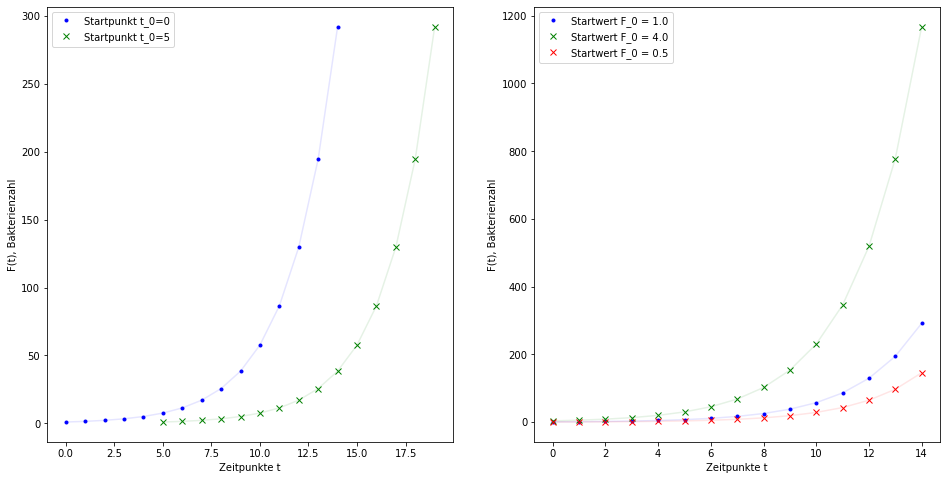

In [3]:
# In dieser Zelle Plotten wir die Dynamik
import matplotlib.pyplot as plt
from myst_nb import glue
fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(I_0, C_0.colony_size(I_0), '.', label='Startpunkt t_0=0', color='b')
ax[0].plot(I_0, C_0.colony_size(I_0), color='b', alpha = 0.1)
ax[0].plot(I_1, C_1.colony_size(I_1),'x', label='Startpunkt t_0=5', color='g')
ax[0].plot(I_1, C_1.colony_size(I_1), color='g', alpha = 0.1)
ax[0].set_xlabel('Zeitpunkte t')
ax[0].set_ylabel('F(t), Bakterienzahl')
ax[0].legend();

# zweiter Subplot
ax[1].plot(I_0, C_0.colony_size(I_0), '.', label='Startwert F_0 = 1.0', color='b')
ax[1].plot(I_0, C_0.colony_size(I_0), color='b',alpha=0.1)
ax[1].plot(I_0, C_2.colony_size(I_0),'x', label='Startwert F_0 = 4.0', color='g')
ax[1].plot(I_0, C_2.colony_size(I_0), color='g', alpha = 0.1)
ax[1].plot(I_0, C_3.colony_size(I_0),'x', label='Startwert F_0 = 0.5', color='r')
ax[1].plot(I_0, C_3.colony_size(I_0), color='r', alpha = 0.1)
ax[1].set_xlabel('Zeitpunkte t')
ax[1].set_ylabel('F(t), Bakterienzahl')
ax[1].legend();

glue("bacteria_growth", fig, display=False)

```{glue:figure} bacteria_growth
:name: "fig:bacteria"

Visualisierung für Beispiel {prf:ref}`ex:bacteria`. Wir erkennen, dass die Dynamik der Koloniegröße nicht von der Startzeit abhängt, sondern nur vom Anfangswert. Zu beachten gilt, es ist ein diskretes System, die angezeichneten kontinuierlichen Linien dienen lediglich zur Veranschaulichung der Dynamik.
```

Diskrete dynamische Systeme tauchen auch in anderen spannenden Anwendungen auf, wie beispielsweise in der [Chaostheorie](https://de.wikipedia.org/wiki/Bifurkation_(Mathematik)#Bifurkationsdiagramm) und in der [Stochastik](https://de.wikipedia.org/wiki/Markow-Kette).

## Kontinuierliche dynamische Systeme

Im Unterschied zu diskreten dynamischen Systemen wird die Zeit bei kontinuierlichen dynamischen Systemen nicht an abzählbar vielen Punkten modelliert, sondern als Kontinuum.
Im Folgenden beschreiben wir das physikalische Experiment des freien Falls als Spezialfall eines kontinuierlichen dynamischen Systems.

````{prf:example} Freier Fall
:label: ex:freefall

In diesem Beispiel betrachten wir ein physikalisches Modell für den freien Fall eines Steins mit Masse $m \in \R^+$, den wir in einer Hand halten, bis wir ihn zu einem definierten Anfangszeitpunkt $t_0 \in I$ mit $I \subset \R^+_0$ fallen lassen.

Die aktuelle Entfernung des Steins zum Boden zu einem Zeitpunkt $t \in I$, d.h. seine gegenwärtige Höhe, ist gegeben durch eine monoton-fallende Funktion $F \colon I \rightarrow \R^+_0$.
Unsere Hand befindet sich zum Anfangszeitpunkt $t_0$ in einer Höhe von $F_0 > 0$.
Für jeden beliebigen Zeitpunkt $t > t_0$ lässt sich die aktuelle Höhe des fallenden Steins mit Hilfe des Newtonschen Gravitationsgesetzes wie folgt angeben:
```{math}
F(t) = \max(0, F_0 - \frac{1}{2}gt^2),
```
wobei $g \approx 9,81 \frac{m}{s^2}$ die Erdbeschleunigungskonstante bezeichnet.

Aus {numref}`fig:free_fall` wird klar, dass auch hier die Dynamik des freien Falls nicht von der Wahl des Anfangszeitpunkts $t_0 \in I$ abhängt.
Anschaulich gesprochen, würde der Stein genauso fallen, wenn wir ihn noch einige Sekunden länger festhalten würden. 
````

In [4]:
# In dieser Zelle initialisieren wir verschieden Steine
T = 5
F_0 = 50.0
S_0 = stone(F_0, 0)
t_1 = 2
S_1 = stone(F_0, t_1)
num_pts = 50
I_0 = np.linspace(0,T, num_pts)
I_1 = np.linspace(t_1,T + t_1 , num_pts)
# andere Fallhöhen
S_2 = stone(2*F_0, 0)
S_3 = stone(0.5*F_0, 0)

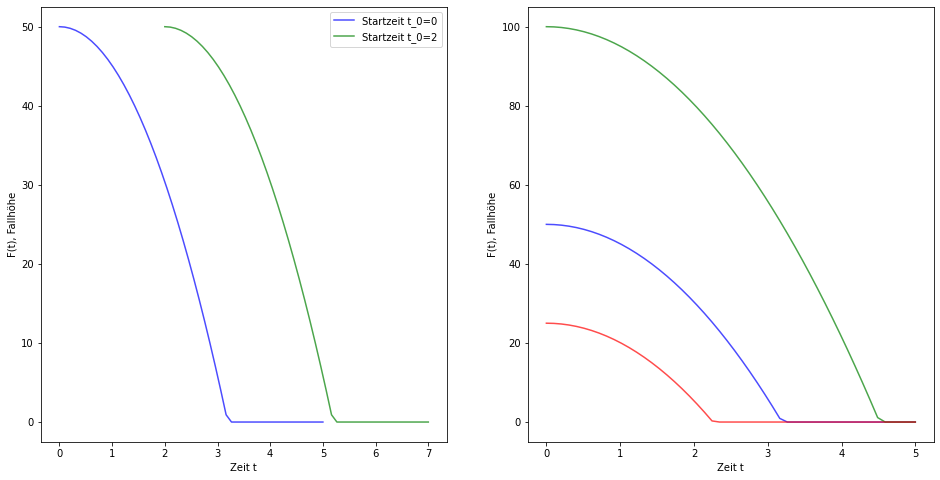

In [5]:
# in dieser Zelle plotten wir die Dynamike der fallenden Steine
fig,ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(I_0, S_0.height(I_0), color='b', alpha = 0.7, label='Startzeit t_0=0')
ax[0].plot(I_1, S_1.height(I_1), color='g', alpha = 0.7, label='Startzeit t_0=2')
ax[0].set_xlabel('Zeit t')
ax[0].set_ylabel('F(t), Fallhöhe')
ax[0].legend();
ax[1].plot(I_0, S_0.height(I_0), color='b', alpha = 0.7, label='Starthöhe F_0=50')
ax[1].plot(I_0, S_2.height(I_0), color='g', alpha = 0.7, label='Starthöhe F_0=100')
ax[1].plot(I_0, S_3.height(I_0), color='r', alpha = 0.7, label='Starthöhe F_0=25')
ax[1].set_xlabel('Zeit t')
ax[1].set_ylabel('F(t), Fallhöhe')
glue("free_fall", fig, display=False)

```{glue:figure} free_fall
:name: "fig:free_fall"

Visualisierung für Beispiel {prf:ref}`ex:freefall`. Wir erkennen, dass die Dynamik der Fallhöhe nicht von der Startzeit abhängt, sondern nur von der Starthöhe.
```

Häufig kommen zur Beschreibung von kontinuierlichen dynamischen Systemen sogenannte **autonome gewöhnliche Differentialgleichungen** zum Einsatz, wie die in Beispiel {prf:ref}`ex:freefall` implizit genutzten Bewegungsgleichungen.
Wir werden diese Art von Differentialgleichungen in Kapitel {ref}`s:fluesse` mathematisch genauer betrachten.